Name:-Tanuja Maruti Waware B.E. Division:- C Batch:- C3 Roll No.:- 14366

# Experiment No.:-3

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
#Preprocessing
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#Dropping the unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
def visualization (x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color = ['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel("No. of customer", fontsize = 20)
    plt.legend()

In [11]:
df_churn_exited = df[df['Exited'] == 1]['Tenure']
df_churn_not_exited = df[df['Exited'] == 0]['Tenure']

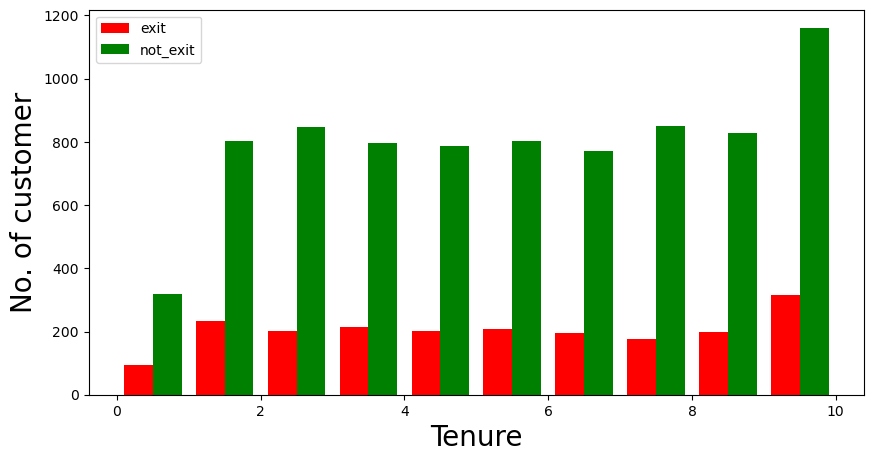

In [12]:
visualization(df_churn_exited,df_churn_not_exited, "Tenure")

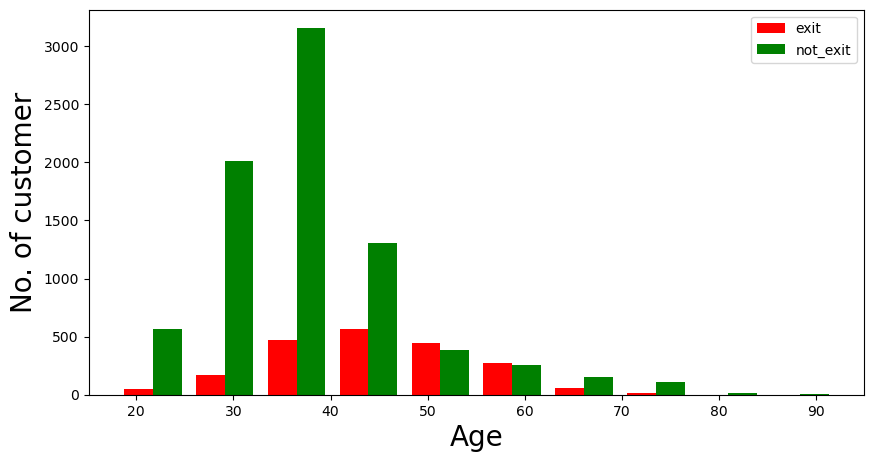

In [13]:
df_churn_exited2 = df[df['Exited'] == 1]['Age']
df_churn_not_exited2 = df[df['Exited'] == 0]['Age']
visualization(df_churn_exited2,df_churn_not_exited2, "Age")

In [14]:
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
states = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [15]:
df = pd.concat([df,gender,states], axis = 1)

In [16]:
#Splitting the training and testing Dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [17]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain']]
y = df['Exited']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size= 0.30)

In [19]:
#normalizing the values with mean as 0 and Standard Deviation as 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.15204428, -0.37420174,  1.38083532, ...,  0.91951339,
        -0.57427105, -0.56877202],
       [-1.28959158, -0.37420174,  1.38083532, ..., -1.08753174,
         1.74133801, -0.56877202],
       [-2.48918692, -0.56484309,  0.34108697, ...,  0.91951339,
        -0.57427105, -0.56877202],
       ...,
       [ 0.14785456, -0.66016377, -1.39182695, ...,  0.91951339,
         1.74133801, -0.56877202],
       [-0.47262579,  2.39009787, -1.04524416, ..., -1.08753174,
        -0.57427105, -0.56877202],
       [-1.95143729, -1.13676715, -0.3520786 , ...,  0.91951339,
        -0.57427105, -0.56877202]])

In [21]:
X_test

array([[ 0.92345499,  0.48368434,  1.38083532, ...,  0.91951339,
        -0.57427105, -0.56877202],
       [-0.24511633, -0.56484309, -0.00549581, ...,  0.91951339,
        -0.57427105, -0.56877202],
       [ 0.38570536, -0.46952242,  1.38083532, ..., -1.08753174,
         1.74133801, -0.56877202],
       ...,
       [ 0.29263331, -0.46952242,  0.68766975, ..., -1.08753174,
         1.74133801, -0.56877202],
       [ 0.8200416 , -0.37420174, -1.73840973, ..., -1.08753174,
        -0.57427105, -0.56877202],
       [ 0.99584437, -0.9461258 ,  0.68766975, ...,  0.91951339,
         1.74133801, -0.56877202]])

In [22]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes = (100, 100, 100), random_state = 0, max_iter = 100, activation = 'relu')
ann.fit(X_train, y_train)

C:\Users\Tanuja\Desktop\Jupyter Notebook\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [23]:
y_pred = ann.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [27]:
y_test.value_counts()

Exited
0    2394
1     606
Name: count, dtype: int64

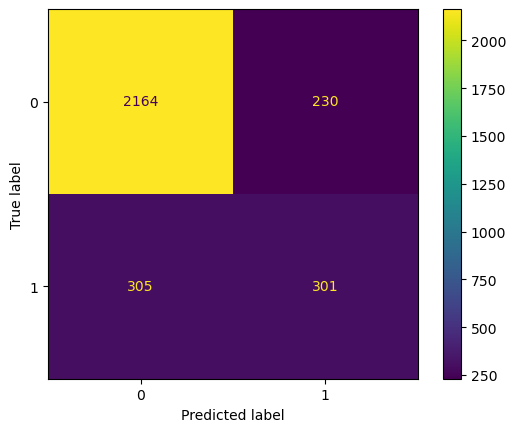

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
print(accuracy_score(y_test, y_pred))

0.8216666666666667


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2394
           1       0.57      0.50      0.53       606

    accuracy                           0.82      3000
   macro avg       0.72      0.70      0.71      3000
weighted avg       0.81      0.82      0.82      3000

